In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import random

### 1. 데이터 불러오기

In [3]:
#Load the dataset using pandas
file_path = '/Users/hailey/Desktop/DS Project/KFT/KFT Dataset - Sheet1.csv'
dataset = pd.read_csv(file_path)
print(dataset.head())

                     Menu Category Base Type                Flavor Tags  \
0       Kung Fu Black Tea  Classic    Black       Bold, Citrusy, Normal   
1        Winter Melon Tea  Classic     Water      Sweet, Smooth, Normal   
2         Honey Green Tea  Classic    Green               Sweet, Normal   
3       Kung Fu Green Tea  Classic    Green   Refreshing, Sweet, Normal   
4  Winter Melon Green Tea  Classic    Green              Smooth, Normal   

  Customizable Sweetness Available Sweetness Level Allergens  \
0                    Yes   0, 30, 50, 70, 100, 120        No   
1                    Yes           30, 50, 70, 100        No   
2                    Yes           30, 50, 70, 100        No   
3                    Yes   0, 30, 50, 70, 100, 120        No   
4                    Yes           30, 50, 70, 100        No   

  Contains Caffeine Contains Gluten Oat Milk Substitution Vegan-friendly  \
0               Yes              No                    No            Yes   
1           

### 2. 데이터의 전반적인 구조 확인

In [5]:
#데이터 정보 확인
# Display general information about the dataset
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Menu                       136 non-null    object
 1   Category                   136 non-null    object
 2   Base Type                  136 non-null    object
 3   Flavor Tags                136 non-null    object
 4   Customizable Sweetness     136 non-null    object
 5   Available Sweetness Level  136 non-null    object
 6   Allergens                  136 non-null    object
 7   Contains Caffeine          136 non-null    object
 8   Contains Gluten            136 non-null    object
 9   Oat Milk Substitution      136 non-null    object
 10  Vegan-friendly             136 non-null    object
 11  Contains dairy             136 non-null    object
dtypes: object(12)
memory usage: 12.9+ KB


In [6]:
# 결측치 확인
# Check for missing values in each column
print("Missing Values:")
print(dataset.isnull().sum())


Missing Values:
Menu                         0
Category                     0
Base Type                    0
Flavor Tags                  0
Customizable Sweetness       0
Available Sweetness Level    0
Allergens                    0
Contains Caffeine            0
Contains Gluten              0
Oat Milk Substitution        0
Vegan-friendly               0
Contains dairy               0
dtype: int64


In [7]:
# 기술 통계
# Display summary statistics for numeric columns
print("Summary Statistics:")
print(dataset.describe(include='all'))

Summary Statistics:
                     Menu Category Base Type     Flavor Tags  \
count                 136      136       136             136   
unique                136        8        18              95   
top     Kung Fu Black Tea    Slush     Water  Creamy, Normal   
freq                    1       30        35               8   

       Customizable Sweetness Available Sweetness Level Allergens  \
count                     136                       136       136   
unique                      2                         8         2   
top                       Yes   0, 30, 50, 70, 100, 120        No   
freq                      127                        80       132   

       Contains Caffeine Contains Gluten Oat Milk Substitution Vegan-friendly  \
count                136             136                   136            136   
unique                 2               2                     2              2   
top                  Yes              No                    No        

In [8]:
## 고유값 확인
# Display the number of unique values for selected categorical columns
print("Unique Values in Categorical Columns:")
for col in ['Menu', 'Category', 'Base Type', 'Flavor Tags']:
    print(f"{col}: {dataset[col].nunique()} unique values")

Unique Values in Categorical Columns:
Menu: 136 unique values
Category: 8 unique values
Base Type: 18 unique values
Flavor Tags: 95 unique values


### 3. 분포 분석

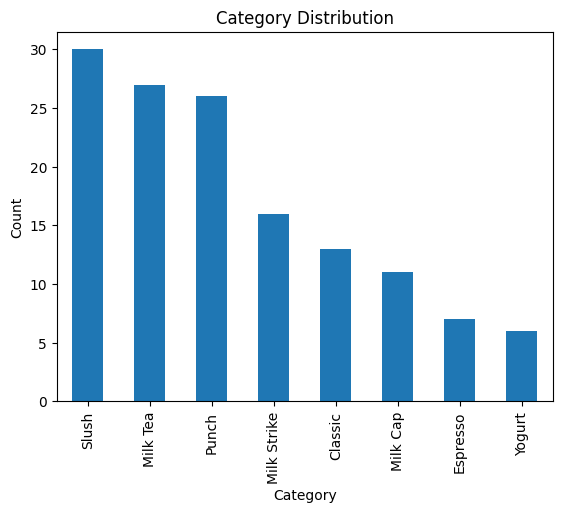

In [10]:
# 음료 카테고리 분포
# Plot the distribution of beverage categories
import matplotlib.pyplot as plt

category_counts = dataset['Category'].value_counts()
category_counts.plot(kind='bar', title='Category Distribution', xlabel='Category', ylabel='Count')
plt.show()

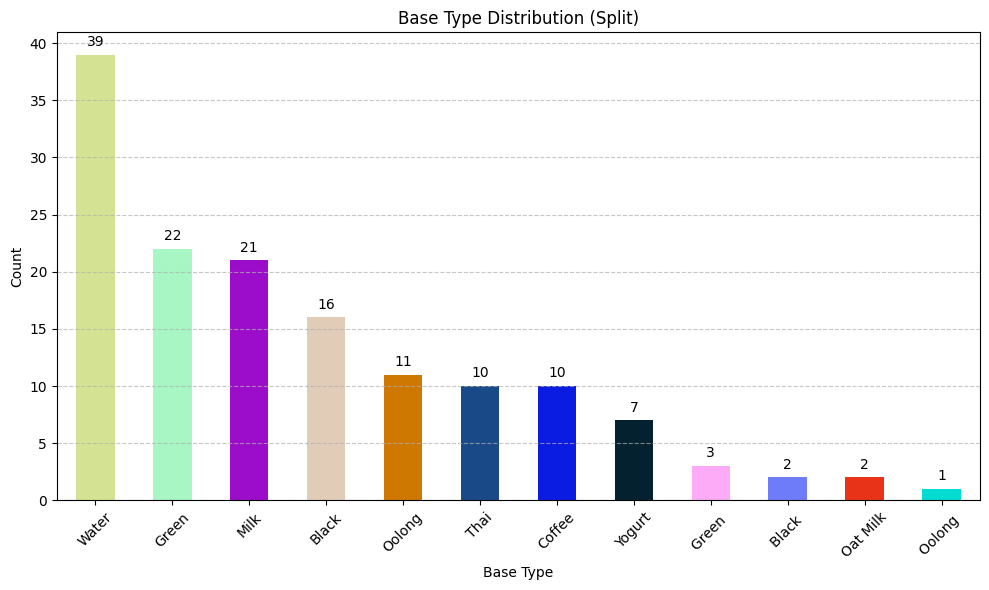

In [32]:
import matplotlib.pyplot as plt
from collections import Counter

# Split the 'Base Type' values and flatten the list
base_type_split = dataset['Base Type'].dropna().str.split(', ').sum()

# Count the occurrences of each base type
base_type_counts = Counter(base_type_split)

# Convert the counts to a DataFrame for easier handling (optional)
base_type_counts_df = pd.DataFrame.from_dict(base_type_counts, orient='index', columns=['Count'])

# Sort the counts for better visualization
base_type_counts_df = base_type_counts_df.sort_values(by='Count', ascending=False)

# Plot the distribution with random colors
random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(len(base_type_counts))]
ax = base_type_counts_df['Count'].plot(
    kind='bar',
    color=random_colors,
    title='Base Type Distribution (Split)',
    figsize=(10, 6),
    xlabel='Base Type',
    ylabel='Count'
)

# Add the count numbers on top of each bar
for i, count in enumerate(base_type_counts_df['Count']):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Add gridlines and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()


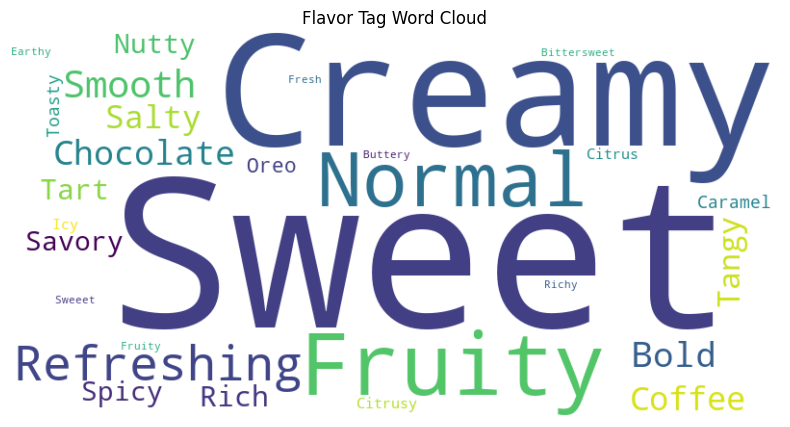

In [12]:
# 맛 태그 분석
# Analyze the frequency of flavor tags

# Flatten all flavor tags into a single list
flavor_tags = dataset['Flavor Tags'].dropna().str.split(', ').sum()
flavor_tag_counts = Counter(flavor_tags)

# Generate a word cloud for flavor tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(flavor_tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Flavor Tag Word Cloud')
plt.show()

### 4. 사용자 맞춤 옵션 분석

Customizable Sweetness Counts:
Customizable Sweetness
Yes    127
No       9
Name: count, dtype: int64


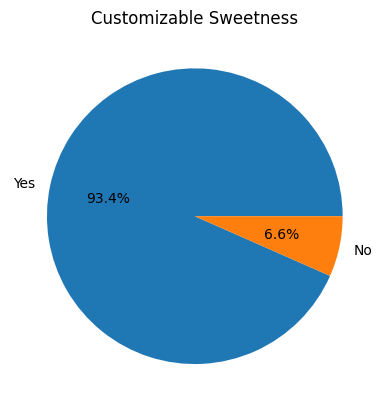

In [14]:
# 당도 조절 가능 여부
# Count the values for customizable sweetness
sweetness_counts = dataset['Customizable Sweetness'].value_counts()
print("Customizable Sweetness Counts:")
print(sweetness_counts)

# Plot the distribution
sweetness_counts.plot(kind='pie', autopct='%1.1f%%', title='Customizable Sweetness')
plt.ylabel('')
plt.show()

Oat Milk Substitution Counts:
Oat Milk Substitution
No     120
Yes     16
Name: count, dtype: int64


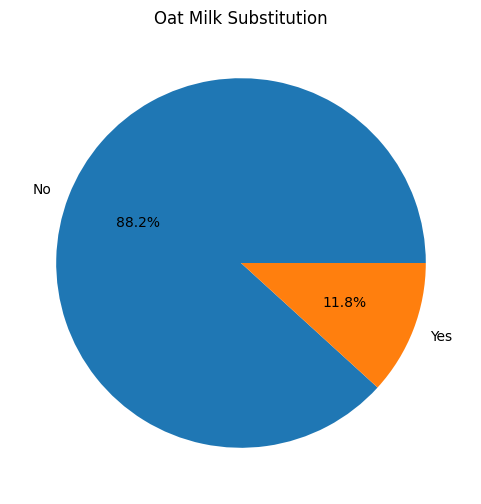

In [15]:
# Oat Milk 대체 가능 여부
# Count the values for oat milk substitution
oat_milk_counts = dataset['Oat Milk Substitution'].value_counts()
print("Oat Milk Substitution Counts:")
print(oat_milk_counts)

# Plot the distribution
oat_milk_counts.plot(kind='pie', autopct='%1.1f%%', title='Oat Milk Substitution', figsize=(6, 6))
plt.ylabel('')
plt.show()


### 5. 식단 관련 분석

Caffeine Inclusion Counts:
Contains Caffeine
Yes    80
No     56
Name: count, dtype: int64

Gluten Inclusion Counts:
Contains Gluten
No     121
Yes     15
Name: count, dtype: int64


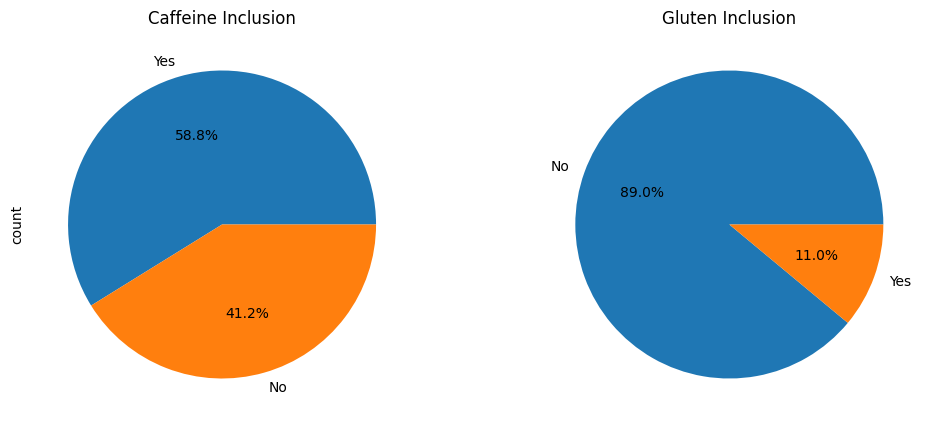

In [17]:
# 카페인 및 글루텐 포함 여부
# Analyze caffeine and gluten inclusion
caffeine_counts = dataset['Contains Caffeine'].value_counts()
gluten_counts = dataset['Contains Gluten'].value_counts()

print("Caffeine Inclusion Counts:")
print(caffeine_counts)
print("\nGluten Inclusion Counts:")
print(gluten_counts)

# Plot the distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
caffeine_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[0], title='Caffeine Inclusion')
gluten_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[1], title='Gluten Inclusion')
plt.ylabel('')
plt.show()

Vegan-Friendly Counts:
Vegan-friendly
No     106
Yes     30
Name: count, dtype: int64


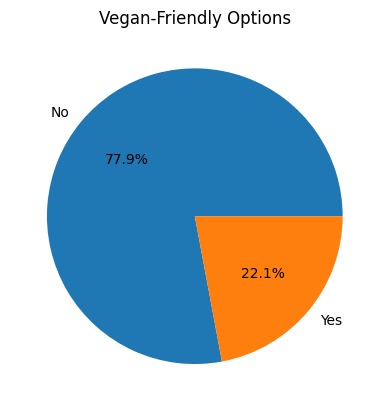

In [18]:
#비건 친화적 음료
# Analyze vegan-friendly options
vegan_counts = dataset['Vegan-friendly'].value_counts()
print("Vegan-Friendly Counts:")
print(vegan_counts)

# Plot the distribution
vegan_counts.plot(kind='pie', autopct='%1.1f%%', title='Vegan-Friendly Options')
plt.ylabel('')
plt.show()